### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1

In [2]:
url = "https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx"
df = pd.read_excel(url)
df.head()

,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


## **Exploratory Data Analysis (EDA)**

### **Data Overview**


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [5]:
df.isnull().sum()

KD_SBR           3
TP_TRN           3
KDSUP       107657
KAS          12195
TRN_DK           3
             ...  
TP_ADJ        9413
USER             3
TANGGAL          3
JAM              3
LAMA_CRD    148452
Length: 61, dtype: int64

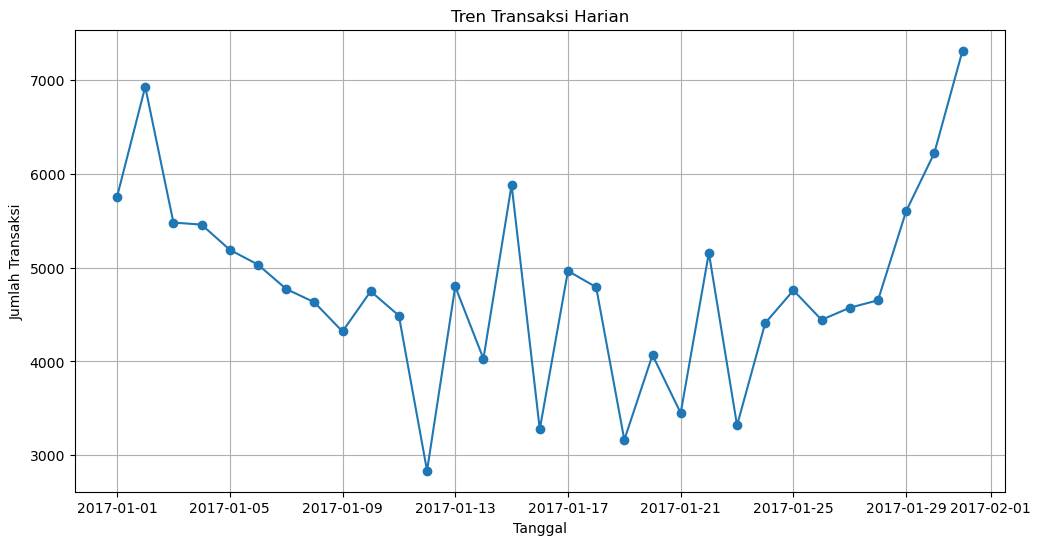

In [3]:
import matplotlib.pyplot as plt

# Mengubah kolom tanggal menjadi tipe datetime dan mengambil bagian tanggal saja
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS'], dayfirst=True).dt.date

# Menghitung jumlah transaksi per hari
daily_transactions = df.groupby('TGL_TRANS').size().reset_index(name='NO_BKT')

# Membuat plot tren transaksi harian
plt.figure(figsize=(12, 6))
plt.plot(daily_transactions['TGL_TRANS'], daily_transactions['NO_BKT'], marker='o', linestyle='-')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.title('Tren Transaksi Harian')
plt.grid(True)
plt.show()


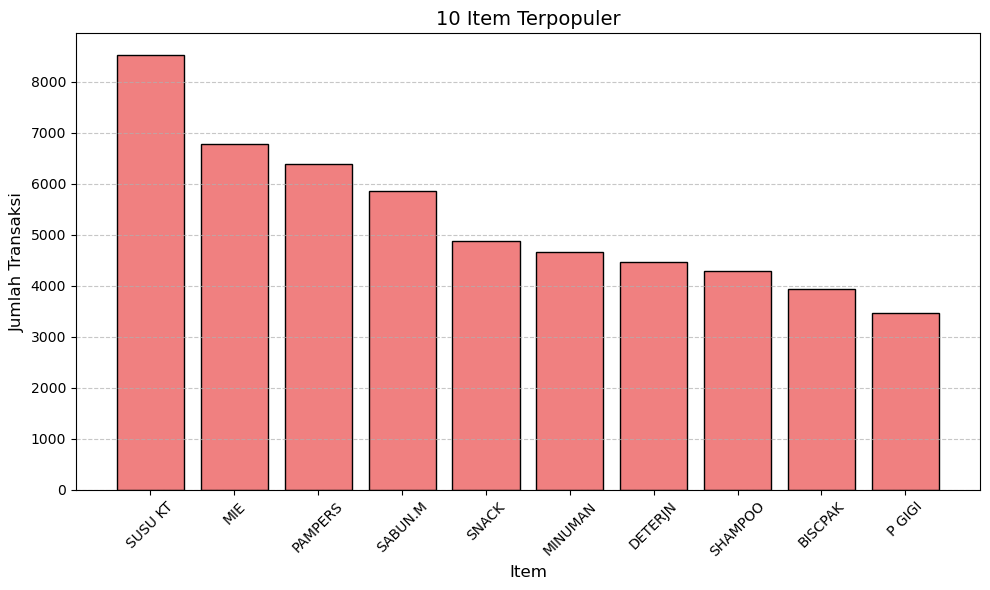

In [6]:
# Menghitung popularitas item berdasarkan jumlah kemunculan
item_popularity = df['KEL'].value_counts().reset_index()

# Mengubah nama kolom agar lebih jelas
item_popularity.columns = ['KEL', 'Jumlah_Transaksi']

# Menampilkan 10 item terpopuler
top_items = item_popularity.iloc[:10]

# Import pustaka visualisasi
import matplotlib.pyplot as plt

# Membuat visualisasi bar chart vertikal
plt.figure(figsize=(10, 6))
plt.bar(top_items['KEL'], top_items['Jumlah_Transaksi'], color='lightcoral', edgecolor='black')
plt.title('10 Item Terpopuler', fontsize=14)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Memiringkan label x agar lebih terbaca
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [7]:
# Convert 'TGL_TRANS' column to datetime if it is not already
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS'], errors='coerce')

# Now, extract the day of the week
df['Days'] = df['TGL_TRANS'].dt.day_name()

# Group by 'Days' and sum up transactions for each day
daily_transactions_count = df.groupby('Days').size().reset_index(name='Transaction_Count')

# Ensure 'Days' is ordered (Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_transactions_count['Days'] = pd.Categorical(daily_transactions_count['Days'], categories=day_order, ordered=True)

# Sort by the correct day order
daily_transactions_count = daily_transactions_count.sort_values('Days')

# Display the result
print(daily_transactions_count)


        Days  Transaction_Count
1     Monday              24061
5    Tuesday              26908
6  Wednesday              19493
4   Thursday              15633
0     Friday              18469
2   Saturday              16902
3     Sunday              27020


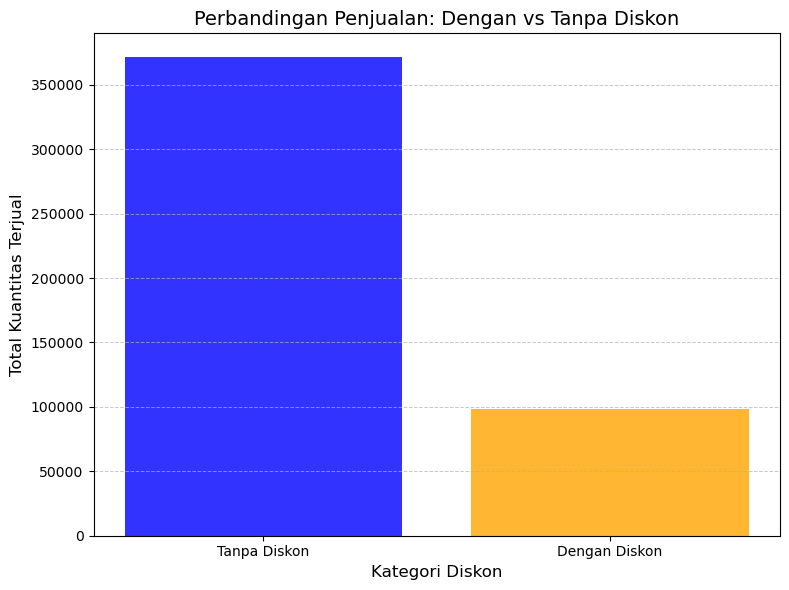

In [4]:
# Memeriksa apakah kolom 'DISC' ada di DataFrame
if 'DISC' in df.columns:
    # Menentukan apakah ada diskon
    df['Diskon_Ada'] = df['DISC'] > 0
    
    # Menghitung total kuantitas terjual berdasarkan keberadaan diskon
    discount_sales = df.groupby('Diskon_Ada')['QTY'].sum().reset_index()
    discount_sales['Label'] = discount_sales['Diskon_Ada'].map({False: 'Tanpa Diskon', True: 'Dengan Diskon'})
    
    # Membuat visualisasi dengan jenis bar
    plt.figure(figsize=(8, 6))
    plt.bar(discount_sales['Label'], discount_sales['QTY'], color=['blue', 'orange'], alpha=0.8)
    plt.title('Perbandingan Penjualan: Dengan vs Tanpa Diskon', fontsize=14)
    plt.xlabel('Kategori Diskon', fontsize=12)
    plt.ylabel('Total Kuantitas Terjual', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.tight_layout()
    plt.show()


In [10]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

basket = df.groupby(['NO_BKT','KEL'])['KEL'].count().unstack().reset_index().fillna(0).set_index('NO_BKT')
basket.head()

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0005/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
basket = df.pivot_table(index='NO_BKT', columns='KEL', aggfunc='size', fill_value=0)

# Step 2: Convert all values greater than 1 to 1 (binary format)
basket[basket > 1] = 1

# Display the first few rows of the transformed dataframe
basket.head()

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Step 1: Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Display the frequent itemsets with support
frequent_itemsets.head(35)

C:\Users\Michelle\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.037991,(AIR.M)
1,0.032251,(ASESORS)
2,0.033590,(B DAPUR)
3,0.063600,(BISCPAK)
4,0.024106,(BTL/DOT)
5,0.032360,(COKLAT)
6,0.026593,(DDORANT)
7,0.083607,(DETERJN)
8,0.028507,(GULA)
9,0.021373,(HBL)


Produk seperti Pampers, MINUMAN, dan SABUN.M memiliki tingkat dukungan tinggi dan merupakan pilihan utama pelanggan. Produk-produk ini layak menjadi fokus utama dalam strategi promosi, seperti diskon, program loyalitas, atau penawaran khusus. Pelanggan sering membeli kombinasi produk seperti BISCPAK dan SNACK atau DETERJN dan SOFTENR, yang menunjukkan peluang besar untuk bundling dan promosi silang. Dengan menawarkan paket hemat atau diskon tambahan untuk produk-produk ini, bisnis dapat mendorong peningkatan pembelian.

Pada kategori kebutuhan bayi dan personal care, produk seperti P GIGI, SABUN.M, dan SHAMPOO menunjukkan pola pembelian bersama yang konsisten. Ini menciptakan peluang untuk bundling produk dalam kategori ini, misalnya paket personal care lengkap. Produk rumah tangga seperti DETERJN, SOFTENR, dan MIE juga sering dibeli bersamaan, sehingga dapat ditempatkan berdekatan di toko untuk memudahkan pelanggan.

Selain itu, analisis lift yang tinggi pada pasangan produk, seperti DETERJN dan SOFTENR, menunjukkan bahwa promosi atau tata letak berbasis pasangan produk ini bisa sangat efektif. Dengan signage kreatif yang mengarahkan pelanggan ke hubungan produk tertentu, penjualan dapat meningkat secara signifikan.

Produk dengan dukungan lebih rendah, seperti ROTI.B dan ROKOK, memerlukan pendekatan pemasaran yang lebih spesifik. Strategi ini bisa mencakup kampanye yang menyasar segmen tertentu, seperti keluarga untuk roti atau pelanggan setia untuk rokok.

Secara keseluruhan, dengan memahami pola pembelian dan keterkaitan produk, bisnis dapat mengoptimalkan promosi, tata letak, dan strategi bundling untuk meningkatkan pengalaman belanja pelanggan sekaligus mendorong pertumbuhan penjualan.